# Improving NN with Dropout

The idea is improving baseline (previous trained model) from 94.5% on training, 94.63% on validation and 94.41% on test.

Dropout is a regularization technique that consists of ramdonly choosing and killing neurons.

In [1]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, RMSprop, Adam
from keras.utils import np_utils
import time
import matplotlib.pyplot as plt



Using TensorFlow backend.


In [2]:
def plot_keras_history(history, epochs, title):
    epoch_count = list(range(1, epochs+1))
    plt.title(title)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.xticks(epoch_count, epoch_count)
    plt.show()

In [3]:
def create_model_with_dropouts():
    model = Sequential()
    model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
    model.add(Activation('relu'))
    model.add(Dropout(DROPOUT)) # DROPOUT = 0.3
    model.add(Dense(N_HIDDEN)) # N_HIDDEN = 128
    model.add(Activation('relu'))
    model.add(Dropout(DROPOUT)) # DROPOUT = 0.3
    model.add(Dense(NB_CLASSES)) # NB_CLASSES = 10
    model.add(Activation('softmax'))
    return model

In [4]:
np.random.seed(1671) # for reproducibility
# network and training
NB_EPOCH = 150
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 # number of outputs = number of digits
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
DROPOUT = 0.3
RESHAPED = 784

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize
X_train /= 255
X_test /= 255
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

### Improving with diferent optimizers
Besides improving the neural network loss with dropouts as above, the neural network can be also be improved by trying different epochs and optimizers. The code below shows the effect of trying different optimizers in the same NN architecture with a fixed number of epochs.

In [6]:
optimizers = { 'SGD':SGD(), 'RMSprop':RMSprop(), 'Adam':Adam(lr=0.001) }

results = {}
test_results = {}

for key in optimizers.keys():
    
    model = create_model_with_dropouts()
    
    model.compile(
        loss='categorical_crossentropy', 
        optimizer=optimizers[key], 
        metrics=['accuracy'])

    history = model.fit(
        X_train, 
        Y_train, 
        batch_size=BATCH_SIZE, 
        epochs=NB_EPOCH, 
        verbose=VERBOSE, 
        validation_split=VALIDATION_SPLIT)
    results[key] = history

    score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
    test_results[key] = score
    


Train on 48000 samples, validate on 12000 samples
Epoch 1/150
48000/48000 [==============================] - 1s 30us/step - loss: 1.7403 - acc: 0.4538 - val_loss: 0.9291 - val_acc: 0.8123
Epoch 2/150
48000/48000 [==============================] - 1s 28us/step - loss: 0.9230 - acc: 0.7229 - val_loss: 0.5400 - val_acc: 0.8653
Epoch 3/150
48000/48000 [==============================] - 1s 27us/step - loss: 0.6934 - acc: 0.7882 - val_loss: 0.4298 - val_acc: 0.8883
Epoch 4/150
48000/48000 [==============================] - 1s 27us/step - loss: 0.5947 - acc: 0.8209 - val_loss: 0.3789 - val_acc: 0.8978
Epoch 5/150
48000/48000 [==============================] - 1s 26us/step - loss: 0.5347 - acc: 0.8394 - val_loss: 0.3456 - val_acc: 0.9041
Epoch 6/150
48000/48000 [==============================] - 1s 27us/step - loss: 0.4976 - acc: 0.8523 - val_loss: 0.3232 - val_acc: 0.9106
Epoch 7/150
48000/48000 [==============================] - 1s 27us/step - loss: 0.4616 - acc: 0.8627 - val_loss: 0.3048 - 

Epoch 118/150
48000/48000 [==============================] - 1s 26us/step - loss: 0.1087 - acc: 0.9672 - val_loss: 0.0908 - val_acc: 0.9739
Epoch 119/150
48000/48000 [==============================] - 1s 27us/step - loss: 0.1117 - acc: 0.9659 - val_loss: 0.0910 - val_acc: 0.9740
Epoch 120/150
48000/48000 [==============================] - 1s 26us/step - loss: 0.1071 - acc: 0.9676 - val_loss: 0.0902 - val_acc: 0.9743
Epoch 121/150
48000/48000 [==============================] - 1s 27us/step - loss: 0.1084 - acc: 0.9670 - val_loss: 0.0905 - val_acc: 0.9742
Epoch 122/150
48000/48000 [==============================] - 1s 27us/step - loss: 0.1075 - acc: 0.9673 - val_loss: 0.0895 - val_acc: 0.9747
Epoch 123/150
48000/48000 [==============================] - 1s 27us/step - loss: 0.1043 - acc: 0.9679 - val_loss: 0.0891 - val_acc: 0.9747
Epoch 124/150
48000/48000 [==============================] - 1s 27us/step - loss: 0.1047 - acc: 0.9685 - val_loss: 0.0894 - val_acc: 0.9745
Epoch 125/150
48000/

Epoch 26/150
48000/48000 [==============================] - 1s 29us/step - loss: 0.0637 - acc: 0.9823 - val_loss: 0.1064 - val_acc: 0.9787
Epoch 27/150
48000/48000 [==============================] - 1s 29us/step - loss: 0.0611 - acc: 0.9829 - val_loss: 0.1071 - val_acc: 0.9789
Epoch 28/150
48000/48000 [==============================] - 1s 29us/step - loss: 0.0620 - acc: 0.9823 - val_loss: 0.1113 - val_acc: 0.9788
Epoch 29/150
48000/48000 [==============================] - 1s 30us/step - loss: 0.0615 - acc: 0.9828 - val_loss: 0.1088 - val_acc: 0.9793
Epoch 30/150
48000/48000 [==============================] - 1s 29us/step - loss: 0.0601 - acc: 0.9835 - val_loss: 0.1185 - val_acc: 0.9789
Epoch 31/150
48000/48000 [==============================] - 1s 30us/step - loss: 0.0609 - acc: 0.9829 - val_loss: 0.1141 - val_acc: 0.9777
Epoch 32/150
48000/48000 [==============================] - 1s 29us/step - loss: 0.0579 - acc: 0.9839 - val_loss: 0.1126 - val_acc: 0.9784
Epoch 33/150
48000/48000 [=

Epoch 85/150
48000/48000 [==============================] - 1s 29us/step - loss: 0.0474 - acc: 0.9887 - val_loss: 0.1543 - val_acc: 0.9772
Epoch 86/150
48000/48000 [==============================] - 1s 29us/step - loss: 0.0507 - acc: 0.9882 - val_loss: 0.1548 - val_acc: 0.9776
Epoch 87/150
48000/48000 [==============================] - 1s 29us/step - loss: 0.0567 - acc: 0.9876 - val_loss: 0.1570 - val_acc: 0.9784
Epoch 88/150
48000/48000 [==============================] - 1s 29us/step - loss: 0.0542 - acc: 0.9883 - val_loss: 0.1575 - val_acc: 0.9777
Epoch 89/150
48000/48000 [==============================] - 1s 29us/step - loss: 0.0507 - acc: 0.9878 - val_loss: 0.1591 - val_acc: 0.9778
Epoch 90/150
48000/48000 [==============================] - 1s 29us/step - loss: 0.0474 - acc: 0.9890 - val_loss: 0.1679 - val_acc: 0.9772
Epoch 91/150
48000/48000 [==============================] - 1s 30us/step - loss: 0.0497 - acc: 0.9886 - val_loss: 0.1689 - val_acc: 0.9772
Epoch 92/150
48000/48000 [=

48000/48000 [==============================] - 2s 33us/step - loss: 0.0285 - acc: 0.9902 - val_loss: 0.0930 - val_acc: 0.9785
Epoch 52/150
48000/48000 [==============================] - 2s 34us/step - loss: 0.0298 - acc: 0.9901 - val_loss: 0.0916 - val_acc: 0.9792
Epoch 53/150
48000/48000 [==============================] - 2s 32us/step - loss: 0.0305 - acc: 0.9899 - val_loss: 0.0927 - val_acc: 0.9793
Epoch 54/150
48000/48000 [==============================] - 2s 32us/step - loss: 0.0288 - acc: 0.9901 - val_loss: 0.0931 - val_acc: 0.9798
Epoch 55/150
48000/48000 [==============================] - 2s 32us/step - loss: 0.0283 - acc: 0.9905 - val_loss: 0.0916 - val_acc: 0.9792
Epoch 56/150
48000/48000 [==============================] - 2s 32us/step - loss: 0.0285 - acc: 0.9905 - val_loss: 0.0940 - val_acc: 0.9802
Epoch 57/150
48000/48000 [==============================] - 2s 32us/step - loss: 0.0287 - acc: 0.9903 - val_loss: 0.0907 - val_acc: 0.9795
Epoch 58/150
48000/48000 [==============

Epoch 110/150
48000/48000 [==============================] - 2s 33us/step - loss: 0.0203 - acc: 0.9933 - val_loss: 0.1089 - val_acc: 0.9806
Epoch 111/150
48000/48000 [==============================] - 2s 32us/step - loss: 0.0247 - acc: 0.9923 - val_loss: 0.1019 - val_acc: 0.9809
Epoch 112/150
48000/48000 [==============================] - 2s 33us/step - loss: 0.0219 - acc: 0.9929 - val_loss: 0.1060 - val_acc: 0.9792
Epoch 113/150
48000/48000 [==============================] - 2s 32us/step - loss: 0.0206 - acc: 0.9935 - val_loss: 0.1064 - val_acc: 0.9795
Epoch 114/150
48000/48000 [==============================] - 2s 32us/step - loss: 0.0183 - acc: 0.9941 - val_loss: 0.1044 - val_acc: 0.9809
Epoch 115/150
48000/48000 [==============================] - 2s 32us/step - loss: 0.0204 - acc: 0.9933 - val_loss: 0.1087 - val_acc: 0.9793
Epoch 116/150
48000/48000 [==============================] - 2s 32us/step - loss: 0.0218 - acc: 0.9934 - val_loss: 0.1081 - val_acc: 0.9791
Epoch 117/150
48000/

In [11]:
for key in test_results.keys():
    print('optimizer: ' + key)
    print('* training acc:   ' + str(results[key].history['acc'][NB_EPOCH-1]))
    print('* validation acc: ' + str(results[key].history['val_acc'][NB_EPOCH-1]))
    print('* test acc:       ' + str(test_results[key][1]))
    print()

optimizer: SGD
* training acc:   0.9718541666666667
* validation acc: 0.9759166665077209
* test acc:       0.9751

optimizer: RMSprop
* training acc:   0.989125
* validation acc: 0.9775833331743876
* test acc:       0.9773

optimizer: Adam
* training acc:   0.9947291666666667
* validation acc: 0.9824166668256124
* test acc:       0.9814



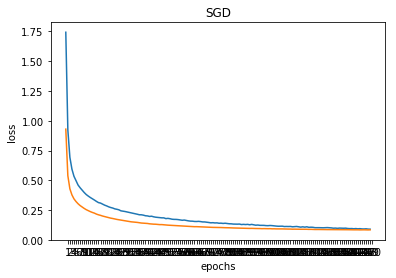

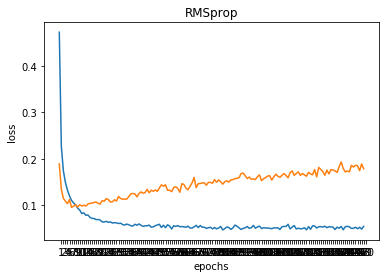

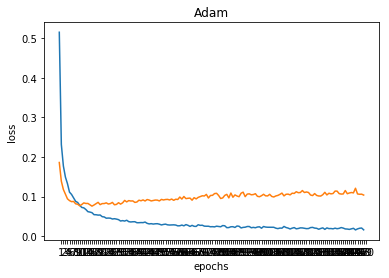

In [8]:
for key in optimizers.keys():
    plot_keras_history(
        history=results[key], 
        epochs=NB_EPOCH, 
        title=key)

### Conclusions

Therefore it can be seen that NN can be improved by changing the following parameters:
* dropouts (compare with different test accuracy)
* optimizer (SGD, Adam, RMSprop)
* epoch (20, 200, etc.)
* optimizer learning rate (not applied in this notebook)
* increasing number of hidden-layers (evaluate one at a time)
* increasing training batch size